### Problème de blé et d'échiquier



### [Problem 1] Number of wheat on a square chessboard 2 x 2

In [89]:
import numpy as np
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])

small_board_ndarray = np.array(small_board_list)
print("Arrange the wheat on a board of 2*2 squares (list)：{}".format(small_board_ndarray))


Arrange the wheat on a board of 2*2 squares (list)：[1 2 4 8]


### [Problem 2] Expansion to a mass n × m

In [90]:
def expention_on_chessbord(n,m):
    n_squares = n * m
    board_list = [1]
    for _ in range(n_squares - 1):
        board_list.append(2*board_list[-1])

    board_ndarray = np.array(board_list)
    return board_ndarray
    
#8x8 squares

%time print("the number of wheat on the 8x8 square chessboard is {}".format(expention_on_chessbord(8,8)[-1]))    

the number of wheat on the 8x8 square chessboard is 9.223372036854776e+18
CPU times: user 952 µs, sys: 2.06 ms, total: 3.01 ms
Wall time: 15 ms


### [Problem 3] Total number of wheat


[9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


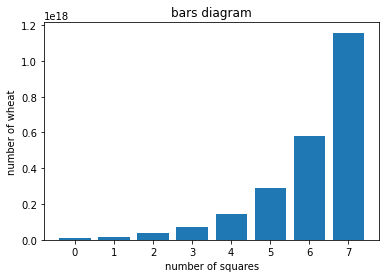

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

board_ndarray = expention_on_chessbord(8,8)
chessboard = board_ndarray.reshape(8,8) 

column_avarage = chessboard.mean(axis=0)

print(column_avarage)# visualise the chessboard

plt.ylabel("number of wheat")
plt.xlabel("number of squares")
plt.title("bars diagram")
plt.bar(np.arange(8),column_avarage)
plt.show()

### [Problem 4] Heat map of the number of wheat

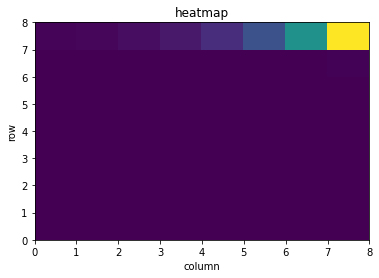

In [92]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(chessboard)
plt.show()

### [Problem 5] How many times is the second half as long as the first half?

In [69]:
chessboard_ndarray = expention_on_chessbord(8,8).reshape(2,32)

each_half_sum = chessboard_ndarray.sum(axis=1) # sum the lign of each half

nb_second_half_as_long_as_first_half = each_half_sum[1]//each_half_sum[0]

print("the second half has longer than first half {} time".format(nb_second_half_as_long_as_first_half))

the second half has longer than first half 4294967296.0 time


### [Problème 6] Other calculation methods

In [87]:
# use np.append()
def expention_on_chessbord(n,m):
    n_squares = n * m
    board_ndarray = np.array([1])
    for _ in range(n_squares - 1):
        board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1]).astype(np.uint64)
        
    return board_ndarray

%time print("Arrange the wheat on a board：{}".format(expention_on_chessbord(8,8)[-1]))

Arrange the wheat on a board：9223372036854775808
CPU times: user 3.01 ms, sys: 2.64 ms, total: 5.65 ms
Wall time: 5.01 ms


In [86]:
#use broadcast

def expention_on_chessbord(n,m):
    n_squares = n * m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    return board_ndarray

%time print("Arrange the wheat on a board：{}".format(expention_on_chessbord(8,8)[-1]))

Arrange the wheat on a board：9223372036854775808
CPU times: user 616 µs, sys: 202 µs, total: 818 µs
Wall time: 950 µs


### [Problem 7] Comparing calculation times

- ### use first calculation methode

CPU times: user 577 µs, sys: 1.02 ms, total: 1.6 ms &nbsp

Wall time: 3.49 ms

- ### use np.append()

CPU times: user 3.01 ms, sys: 2.64 ms, total: 5.65 ms 

Wall time: 5.01 ms
    
- ### use broadcast

CPU times: user 616 µs, sys: 202 µs, total: 818 µs 

Wall time: 950 µs